In [7]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
#from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.optimizers import Adam
#from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="True"
#from __future__ import print_function

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
import os
import random
from PIL import Image

# Paths to your folders
path_normal = "C:\\Users\\soren\\Documents\\anna\\Tanaka_et_al_2023\\normal"
path_pain = "C:\\Users\\soren\\Documents\\anna\\Tanaka_et_al_2023\\pain"
path_tickle = "C:\\Users\\soren\\Documents\\anna\\Tanaka_et_al_2023\\tickle"

# Split ratio (e.g., 80% train, 20% test)
split_ratio = 0.8

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.bmp'):  # Adjust extension if needed
            filepath = os.path.join(folder, filename)
            images.append(filepath)
    return images

# Load all images from the folders
normal_images = load_images_from_folder(path_normal)
pain_images = load_images_from_folder(path_pain)
tickle_images = load_images_from_folder(path_tickle)

# Combine all images and create labels (optional if required for classification tasks)
all_images = normal_images + pain_images + tickle_images
labels = (["normal"] * len(normal_images) +
          ["pain"] * len(pain_images) +
          ["tickle"] * len(tickle_images))

# Combine images and labels into a single list for shuffling
combined = list(zip(all_images, labels))
random.shuffle(combined)

# Split into train and test sets
split_index = int(len(combined) * split_ratio)
train_data = combined[:split_index]
test_data = combined[split_index:]

# Separate paths and labels for train and test
train_images, train_labels = zip(*train_data)
test_images, test_labels = zip(*test_data)

# Print summary
print(f"Total images: {len(all_images)}")
print(f"Training set: {len(train_images)} images")
print(f"Testing set: {len(test_images)} images")

# Example: Open an image from the training set
# image = Image.open(train_images[0])
# image.show()

# Save train and test splits to files if needed
with open("train_images.txt", "w") as train_file:
    train_file.writelines(f"{img}\n" for img in train_images)

with open("test_images.txt", "w") as test_file:
    test_file.writelines(f"{img}\n" for img in test_images)


Total images: 9297
Training set: 7437 images
Testing set: 1860 images


In [10]:
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
from keras.layers import Input, Dense
from keras.models import Model
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats (28X28 digits)
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation="relu")(input_img)
decoded = Dense(784, activation="sigmoid")(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")


In [14]:
autoencoder.fit(x_train, x_train,
 epochs=20,
 batch_size=256,
 shuffle=True,
 validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3854 - val_loss: 0.1890
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1799 - val_loss: 0.1538
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1488 - val_loss: 0.1321
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1299 - val_loss: 0.1198
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1188 - val_loss: 0.1111
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1112 - val_loss: 0.1056
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1056 - val_loss: 0.1014
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1019 - val_loss: 0.0984
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0990 - val_loss: 0.0964
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0973 - val_loss: 0.0950
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0958 - val_loss: 0.0941
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [16]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)
encoded_imgs[0].shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(784,)

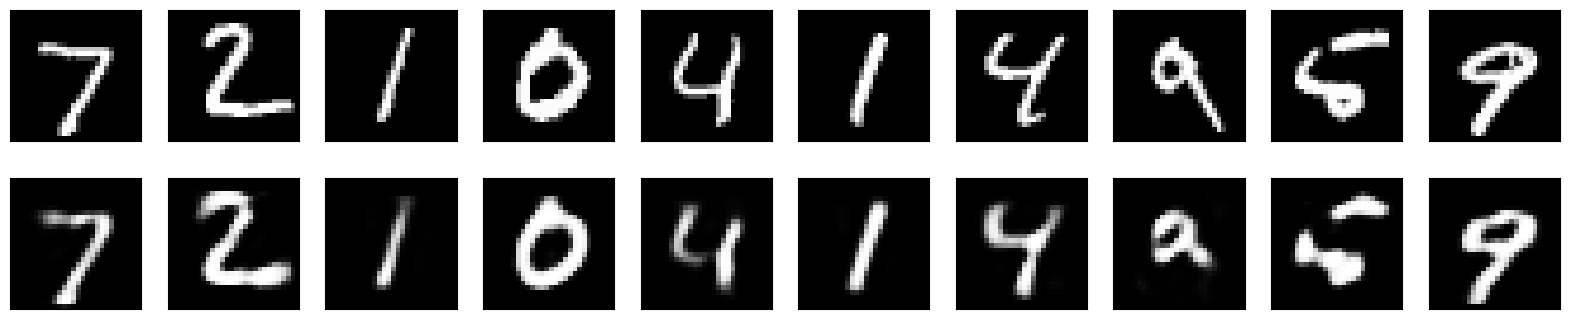

In [17]:
# use Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
 # display original
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
# display reconstruction
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Paths to your folders
path_normal = "C:\\Users\\soren\\Documents\\anna\\Tanaka_et_al_2023\\normal"
path_pain = "C:\\Users\\soren\\Documents\\anna\\Tanaka_et_al_2023\\pain"
path_tickle = "C:\\Users\\soren\\Documents\\anna\\Tanaka_et_al_2023\\tickle"

def load_and_preprocess_images(folder, image_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.bmp'):  # Adjust extension if necessary
            filepath = os.path.join(folder, filename)
            img = Image.open(filepath).convert('L')  # Grayscale
            img = img.resize(image_size)  # Resize while preserving as much detail as possible
            images.append(np.array(img) / 255.0)  # Normalize
    return np.array(images)

# Load all categories
normal_images = load_and_preprocess_images(path_normal)
pain_images = load_and_preprocess_images(path_pain)
tickle_images = load_and_preprocess_images(path_tickle)

# Combine all data
all_images = np.concatenate([normal_images, pain_images, tickle_images], axis=0)
all_images = all_images.reshape(all_images.shape[0], 224, 224, 1)  # Add channel dimension

# Train-test split
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Define the autoencoder
input_img = Input(shape=(224, 224, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 112, 112, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 56, 56, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 224, 224, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the autoencoder
history = autoencoder.fit(
    train_images, train_images,
    epochs=50,
    batch_size=64,
    shuffle=True,
    validation_data=(test_images, test_images)
)

# Save the model
autoencoder.save("mouse_autoencoder.h5")

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - loss: 0.5798 - val_loss: 0.4899
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 120s 953ms/step - loss: 0.4895 - val_loss: 0.4878
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 106s 898ms/step - loss: 0.4884 - val_loss: 0.4872
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 107s 914ms/step - loss: 0.4878 - val_loss: 0.4867
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 109s 918ms/step - loss: 0.4872 - val_loss: 0.4866
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 110s 936ms/step - loss: 0.4872 - val_loss: 0.4862
Epoch 7/50
  1/117 ━━━━━━━━━━━━━━━━━━━━ 2:58 2s/step - loss: 0.4885

KeyboardInterrupt: 

59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step


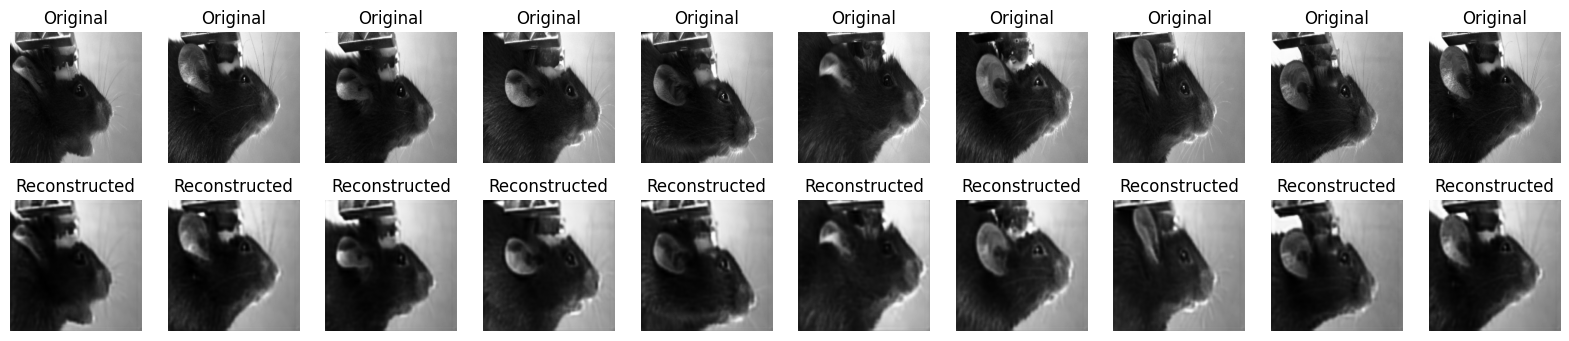

In [27]:
import matplotlib.pyplot as plt

# Predict on test data
decoded_images = autoencoder.predict(test_images)

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(224, 224), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(224, 224), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [28]:
# Create an encoder model
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=3).output)  # Replace 'index=3' with the correct index for the last encoder layer
encoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 112, 112, 16)   │         4,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,944 (19.31 KB)

 Trainable params: 4,944 (19.31 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Get latent representations
train_latent = encoder.predict(train_images)
test_latent = encoder.predict(test_images)

# Assuming you split `normal_images`, `pain_images`, and `ticle_images` for training and testing
num_train_normal = len(normal_images[:len(train_images) // 3])
num_train_pain = len(pain_images[:len(train_images) // 3])
num_train_ticle = len(tickle_images[:len(train_images) // 3])

train_labels = (
    ["normal"] * num_train_normal +
    ["pain"] * num_train_pain +
    ["ticle"] * num_train_ticle
)

# Repeat the process for test_labels
num_test_normal = len(normal_images[:len(test_images) // 3])
num_test_pain = len(pain_images[:len(test_images) // 3])
num_test_ticle = len(tickle_images[:len(test_images) // 3])

test_labels = (
    ["normal"] * num_test_normal +
    ["pain"] * num_test_pain +
    ["ticle"] * num_test_ticle
)

233/233 ━━━━━━━━━━━━━━━━━━━━ 84s 360ms/step


ResourceExhaustedError: {{function_node __wrapped__ConcatV2_N_233_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[7437,112,112,16] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:ConcatV2] name: concat

In [18]:
print(f"Latent space representations: {test_latent.shape[0]}")  # Number of test samples
print(f"Labels: {len(test_labels)}")  # Number of labels

Latent space representations: 1860
Labels: 1860


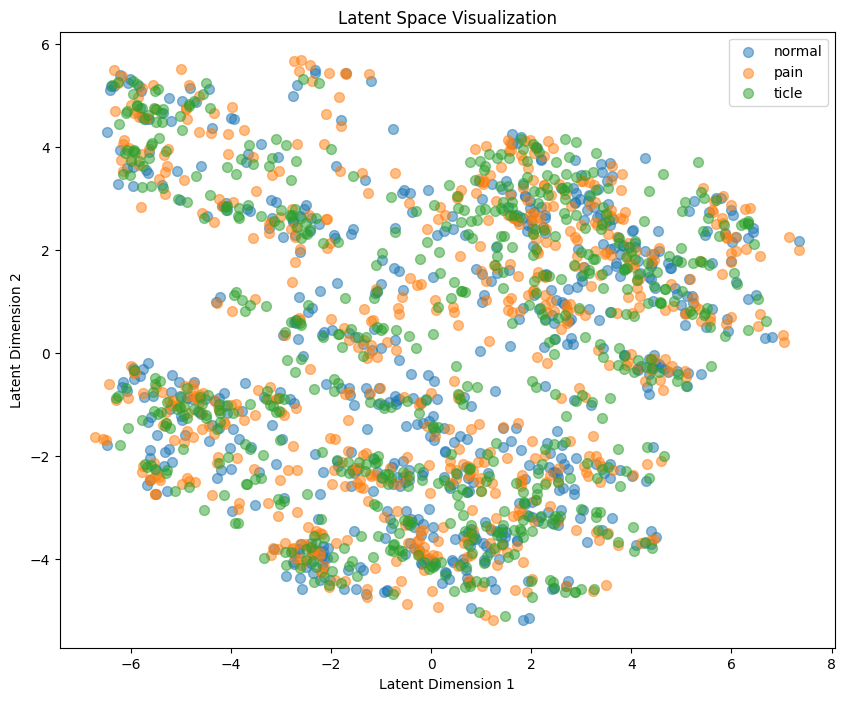

In [19]:
# Plot the 2D latent space
plt.figure(figsize=(10, 8))
for stimulus, color in zip(["normal", "pain", "ticle"], ['blue', 'red', 'green']):
    indices = [i for i, label in enumerate(test_labels) if label == stimulus]
    plt.scatter(latent_2d[indices, 0], latent_2d[indices, 1], label=stimulus, alpha=0.5, s=50)

plt.legend()
plt.title("Latent Space Visualization")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()